# Plot Convergence Test Long

In [9]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import matplotlib.ticker as mticker
import math

%config InlineBackend.figure_formats = ['svg']

In [2]:
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 9.
plt.rcParams['lines.markeredgewidth'] = 0.7

In [3]:
main_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL-multiple\\'
# ra_path = ['1e4','1e5','1e6','1e7','1e8','1e9','1e10']

fname = os.path.join(main_path,'[!m]*')
fileL = glob.glob(fname) #list of files
fileL = [file.replace(main_path,'') for file in fileL]
ra_path = sorted (fileL, key = lambda x: (len (x), x))

newColOrder = ['Ra','Res','NuT','NuB']; Data = pd.DataFrame();

for i in range(len(ra_path)):
    dataRes = []
    fname = os.path.join(main_path+ra_path[i],'[!m]*')
    fileL = glob.glob(fname) #list of files
    fileL = [file.replace(main_path+ra_path[i]+'\\','') for file in fileL]
    [fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'txt' in file];
    [fileL.remove(file) for file in fileL if '_' in file]; [fileL.remove(file) for file in fileL if 'txt' in file];
    fileL = list(map(int, fileL)); fileL = sorted(fileL)
    dataRes = pd.DataFrame(fileL) #This gets the resolutions from folder names
    
    fname = os.path.join(main_path+ra_path[i],'[!m]*.txt')
    fileL = glob.glob(fname) #list of files
    temp = []
    for file in fileL:
        a = fileL.index(file)
        b = pd.read_csv(file,header=None)
        b.rename(columns={0:a}, inplace=True)
        temp.append(b)
    c = b.copy()
    c.values[:] = ra_path[i]
    temp.append(c)

    my_data = pd.concat(temp, axis=1, join="inner",ignore_index=True)
    my_data.insert(3, 3, dataRes)
    my_data.rename(columns={0:'NuT',1:'NuB',2:'Ra',3:'Res'},inplace=True)
    my_data = my_data[newColOrder]
    Data = pd.concat([Data,my_data],ignore_index=True)

In [4]:
Data

,Ra,Res,NuT,NuB
0,10000.0,32,4.709550,4.709240
1,10000.0,64,4.718690,4.718730
2,100000.0,32,8.926851,8.940299
3,100000.0,64,11.235100,11.235400
4,1000000.0,32,18.886308,18.871865
5,1000000.0,64,19.051682,19.019011
6,10000000.0,32,35.872515,36.239470
7,10000000.0,64,40.350490,40.527893
8,100000000.0,64,75.704993,75.628646
9,3000000.0,64,27.470039,27.453033


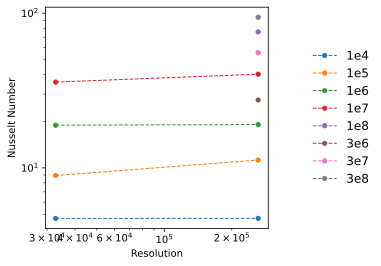

In [6]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

data = [[] for i in range(lenRa)] #empty nested list

for i in range(lenRa):
    data[i] = Data.loc[Data['Ra'] == RaU[i]].to_numpy()

plt.figure();

for i in range(lenRa):
    plt.plot(data[i][:,1]**3,data[i][:,2],'.--',label=ra_path[i])

plt.ylabel('Nusselt Number')
plt.xlabel('Resolution');
plt.yscale('log');
plt.xscale('log');
plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.5, 0.5));

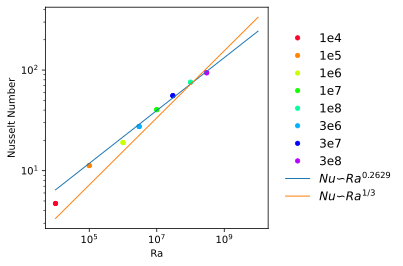

In [7]:
dataS = [[] for i in range(lenRa)] #empty nested list for largest resolution value

for i in range(lenRa):
    maxRes = np.max(Data['Res'].loc[Data['Ra'] == RaU[i]])
    dataS[i] = Data.loc[(Data['Ra'] == RaU[i]) & (Data['Res'] == maxRes)].to_numpy()


colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))
        
list1 = []; list2 = [];

nu = plt.figure()
for i in range(lenRa):
    plt.plot(dataS[i][0,0],dataS[i][0,2],'.',label=ra_path[i],color=colors[i])
    plt.plot(dataS[i][0,0],dataS[i][0,3],'.',color=colors[i])
    list1.append(dataS[i][0,0]); list1.append(dataS[i][0,0])
    list2.append(dataS[i][0,2]); list2.append(dataS[i][0,3])

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e4,1e10,1e4)
s='{}'.format(round(m1[0],4));

plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'convergence_nu_multi.png',pad_inches=0.1,bbox_inches='tight');